# Axial load carrying capacity prediction through ensemble learning models

A database consisting of 719 samples has been used for the training and testing of the ensemble learning models. The database is split into a training and a test set in 70% to 30% ratio. The outcome of the XGBoost, LightGBM, CatBoost and Random Forest models have been presented below.  

In [1]:
from pandas import read_csv, DataFrame
from numpy import absolute,arange,mean,std,argsort,sqrt
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor 
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, accuracy_score, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
colnames = ['B','H','t','L','fy','fc','Ntest']
#url="http://gfbfh246daf01191a4b4cskkuop9ffu0b066xu.fgac.hlju.cwkeji.cn/ccakiroglu/cfst_ml/main/RectangularConcentricStub7columns.csv"
#df = read_csv(url,header=0,names=colnames)
df = read_csv("../input/rectangularstubcolumn/RectangularConcentricStub7columns.csv",header=0,names=colnames)
data=df.values
print('data.shape:',data.shape)
# split into inputs and outputs
#X, y = df.iloc[:, :-1], df.iloc[:, -1]
X, y = data[:, :-1], data[:, -1]
print('X.shape:', X.shape,'y.shape', y.shape)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

XGBmodel = XGBRegressor()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++
cv = KFold(n_splits=10, shuffle=True, random_state=1)
#Here we list the parameters we want to tune
space = dict()
#space['n_estimators'] = [1, 20, 100, 500, 1000]
#space['max_depth']=[2, 5, 10, 20]
#space['learning_rate']=[.02, 0.1, 0.2]
#space['n_estimators'] = arange(1,600,50)
space['n_estimators'] = [500]
space['max_depth']=[2]
#space['min_child_weight']=[1, 5, 10]
#space['learning_rate']=arange(0.1, 4, 0.5)
#space['learning_rate']=[.03, 0.05, .07]
space['learning_rate']=[0.2]
i=1000
r2scoresLR02=[]
#while i<2025:
#    space['n_estimators'] = [i]
    #space['loss']=['linear', 'square', 'exponential']
search = GridSearchCV(XGBmodel, space, n_jobs=-1, cv=cv, refit=True)
result = search.fit(X_train, y_train)
best_model = result.best_estimator_
yhat_test = best_model.predict(X_test)
yhat_train = best_model.predict(X_train)

print('MAPE train= ',mean_absolute_percentage_error(y_train, yhat_train))
print('RMSE train= ',sqrt(mean_squared_error(y_train, yhat_train)))
print('MAE train= ',mean_absolute_error(y_train, yhat_train))
print('R2 train:',r2_score(y_train, yhat_train))
print('MAPE test= ',mean_absolute_percentage_error(y_test, yhat_test))
print('RMSE test= ',sqrt(mean_squared_error(y_test, yhat_test)))
print('MAE test= ',mean_absolute_error(y_test, yhat_test))
print('R2 test:',r2_score(y_test, yhat_test))
print('Best parameters are',search.best_params_)

data.shape: (719, 7)
X.shape: (719, 6) y.shape (719,)
(503, 6) (216, 6) (503,) (216,)
MAPE train=  0.04262226318306489
RMSE train=  132.7105629667564
MAE train=  80.88873484556528
R2 train: 0.9958179667003022
MAPE test=  0.08541468480733458
RMSE test=  297.51590092623485
MAE test=  163.68789509526007
R2 test: 0.9787510004797818
Best parameters are {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 500}


Text(0.5, 1.0, 'XGBoost')

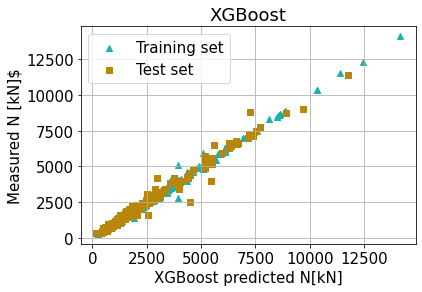

In [2]:
from matplotlib import pyplot
pyplot.rc('font',size=15)
pyplot.scatter(yhat_train,y_train, marker='^',facecolor='lightseagreen',edgecolor='lightseagreen', label=r'Training set')
pyplot.scatter(yhat_test,y_test, marker='s',facecolor='darkgoldenrod',edgecolor='darkgoldenrod', label=r'Test set')
pyplot.ylabel(r'Measured N [kN]$')
pyplot.xlabel(r'XGBoost predicted N[kN]')
pyplot.legend()
pyplot.grid(True)
pyplot.title('XGBoost')

In [3]:
# The LightGBM model
from lightgbm.sklearn import LGBMRegressor
LGBMmodel = LGBMRegressor()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++
cv = KFold(n_splits=10, shuffle=True, random_state=1)
#Here we list the parameters we want to tune
space = dict()
#space['n_estimators'] = [1, 20, 100, 500, 1000]
#space['max_depth']=[2, 5, 10, 20]
#space['learning_rate']=[.02, 0.1, 0.2]
space['n_estimators'] = [1000]
#space['n_estimators'] = [10, 20, 100, 500]
space['max_depth']=[2]
#space['min_child_weight']=[1, 5, 10]
#space['learning_rate']=arange(0.1, 4, 0.5)
#space['learning_rate']=[.03, 0.05, .07]
space['learning_rate']=[0.2]
search = GridSearchCV(LGBMmodel, space, n_jobs=-1, cv=cv, refit=True)
result = search.fit(X_train, y_train)
best_model = result.best_estimator_
yhat_test = best_model.predict(X_test)
yhat_train = best_model.predict(X_train)
print('MAPE train= ',mean_absolute_percentage_error(y_train, yhat_train))
print('RMSE train= ',sqrt(mean_squared_error(y_train, yhat_train)))
print('MAE train= ',mean_absolute_error(y_train, yhat_train))
print('R2 train:',r2_score(y_train, yhat_train))
print('MAPE test= ',mean_absolute_percentage_error(y_test, yhat_test))
print('RMSE test= ',sqrt(mean_squared_error(y_test, yhat_test)))
print('MAE test= ',mean_absolute_error(y_test, yhat_test))
print('R2 test:',r2_score(y_test, yhat_test))#original
print('Best parameters are',search.best_params_)#original

MAPE train=  0.045116575626269154
RMSE train=  141.44865653732546
MAE train=  89.19946381515429
R2 train: 0.9952491189437355
MAPE test=  0.08577292094641603
RMSE test=  297.78619908489367
MAE test=  174.99781806440055
R2 test: 0.9787123727997937
Best parameters are {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 1000}


Text(0.5, 1.0, 'LightGBM')

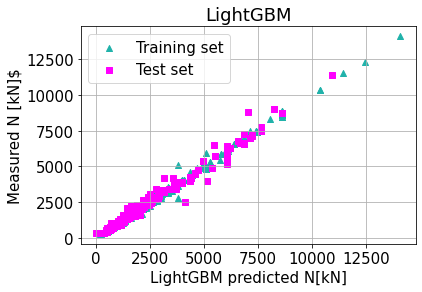

In [4]:
pyplot.scatter(yhat_train,y_train, marker='^',facecolor='lightseagreen',edgecolor='lightseagreen', label=r'Training set')
pyplot.scatter(yhat_test,y_test, marker='s',facecolor='fuchsia',edgecolor='fuchsia', label=r'Test set')
pyplot.ylabel(r'Measured N [kN]$')
pyplot.xlabel(r'LightGBM predicted N[kN]')
pyplot.legend()
pyplot.grid(True)
pyplot.title('LightGBM')

In [5]:
# The Random Forest model
from sklearn.ensemble import RandomForestRegressor
RandomForestModel = RandomForestRegressor()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++
cv = KFold(n_splits=10, shuffle=True, random_state=1)
#Here we list the parameters we want to tune
space = dict()
search = GridSearchCV(RandomForestModel, space, n_jobs=-1, cv=cv, refit=True)
result = search.fit(X_train, y_train)
best_model = result.best_estimator_
yhat_test = best_model.predict(X_test)
yhat_train = best_model.predict(X_train)
print('MAPE train= ',mean_absolute_percentage_error(y_train, yhat_train))
print('RMSE train= ',sqrt(mean_squared_error(y_train, yhat_train)))
print('MAE train= ',mean_absolute_error(y_train, yhat_train))
print('R2 train:',r2_score(y_train, yhat_train))
print('MAPE test= ',mean_absolute_percentage_error(y_test, yhat_test))
print('RMSE test= ',sqrt(mean_squared_error(y_test, yhat_test)))
print('MAE test= ',mean_absolute_error(y_test, yhat_test))
print('R2 test:',r2_score(y_test, yhat_test))#original
print('Best parameters are',search.best_params_)#original

MAPE train=  0.04110974356462024
RMSE train=  175.94337438749506
MAE train=  91.55366382696222
R2 train: 0.992649407661681
MAPE test=  0.08883750774995545
RMSE test=  376.7199266235217
MAE test=  190.6077348279036
R2 test: 0.9659313198664723
Best parameters are {}


Text(0.5, 1.0, 'Random Forest')

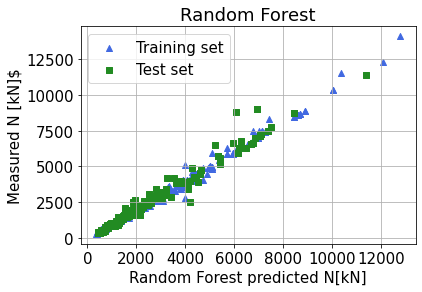

In [6]:
pyplot.scatter(yhat_train,y_train, marker='^',facecolor='royalblue',edgecolor='royalblue', label=r'Training set')
pyplot.scatter(yhat_test,y_test, marker='s',facecolor='forestgreen',edgecolor='forestgreen', label=r'Test set')
pyplot.ylabel(r'Measured N [kN]$')
pyplot.xlabel(r'Random Forest predicted N[kN]')
pyplot.legend()
pyplot.grid(True)
pyplot.title('Random Forest')

In [7]:
# The CatBoost model
from catboost import CatBoostRegressor

CatBoostModel = CatBoostRegressor()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++
cv = KFold(n_splits=10, shuffle=True, random_state=1)
#Here we list the parameters we want to tune
space = dict()
search = GridSearchCV(CatBoostModel, space, n_jobs=-1, cv=cv, refit=True)
result = search.fit(X_train, y_train)
best_model = result.best_estimator_
yhat_test = best_model.predict(X_test)
yhat_train = best_model.predict(X_train)
print('MAPE train= ',mean_absolute_percentage_error(y_train, yhat_train))
print('RMSE train= ',sqrt(mean_squared_error(y_train, yhat_train)))
print('MAE train= ',mean_absolute_error(y_train, yhat_train))
print('R2 train:',r2_score(y_train, yhat_train))
print('MAPE test= ',mean_absolute_percentage_error(y_test, yhat_test))
print('RMSE test= ',sqrt(mean_squared_error(y_test, yhat_test)))
print('MAE test= ',mean_absolute_error(y_test, yhat_test))
print('R2 test:',r2_score(y_test, yhat_test))#original
print('Best parameters are',search.best_params_)#original

Learning rate set to 0.036115
0:	learn: 2020.5284756	total: 68.8ms	remaining: 1m 8s
1:	learn: 1972.5269575	total: 70ms	remaining: 34.9s
2:	learn: 1925.5964739	total: 80.2ms	remaining: 26.6s
3:	learn: 1880.9022196	total: 82ms	remaining: 20.4s
4:	learn: 1837.7721637	total: 95.2ms	remaining: 18.9s
5:	learn: 1794.3572911	total: 98.4ms	remaining: 16.3s
6:	learn: 1755.4802284	total: 100ms	remaining: 14.2s
7:	learn: 1713.4499790	total: 103ms	remaining: 12.7s
8:	learn: 1672.6037292	total: 117ms	remaining: 12.9s
9:	learn: 1634.7073052	total: 120ms	remaining: 11.9s
10:	learn: 1600.8515421	total: 123ms	remaining: 11s
11:	learn: 1563.7447068	total: 136ms	remaining: 11.2s
12:	learn: 1526.7864634	total: 139ms	remaining: 10.6s
13:	learn: 1493.4653823	total: 142ms	remaining: 9.99s
14:	learn: 1461.1669186	total: 143ms	remaining: 9.42s
15:	learn: 1428.9230416	total: 147ms	remaining: 9.02s
16:	learn: 1396.4575161	total: 148ms	remaining: 8.55s
17:	learn: 1367.5800335	total: 149ms	remaining: 8.13s
18:	lear

Text(0.5, 1.0, 'CatBoost')

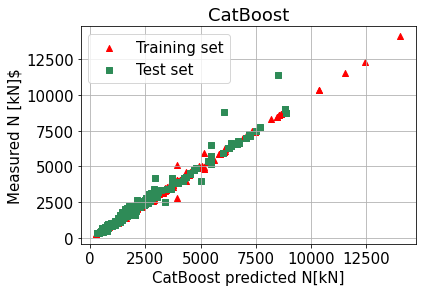

In [8]:
pyplot.scatter(yhat_train,y_train, marker='^',facecolor='red',edgecolor='red', label=r'Training set')
pyplot.scatter(yhat_test,y_test, marker='s',facecolor='seagreen',edgecolor='seagreen', label=r'Test set')
pyplot.ylabel(r'Measured N [kN]$')
pyplot.xlabel(r'CatBoost predicted N[kN]')
pyplot.legend()
pyplot.grid(True)
pyplot.title('CatBoost')